In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [10]:
airbnb = pd.read_csv('C:/Users/shedgep/DataScience/Airbnb/data/listings.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,85,180,1,2013-10-21,0.01,2,0
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,79,90,18,2014-12-26,0.24,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,71,6,20,2015-10-01,0.18,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,170,90,20,2020-01-17,0.19,8,365
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,96,90,24,2019-10-13,0.22,8,365


In [11]:
airbnb.shape

(7368, 16)

In [12]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
#Get the region areas of singapore
airbnb['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region',
       'North-East Region', 'West Region'], dtype=object)

In [14]:
#Get the planning areas have the Airbnb listing
airbnb['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Serangoon', 'Jurong West',
       'Rochor', 'Downtown Core', 'Marine Parade', 'Pasir Ris',
       'Toa Payoh', 'Outram', 'Punggol', 'Queenstown', 'Tanglin',
       'Kallang', 'Novena', 'Singapore River', 'Orchard', 'Ang Mo Kio',
       'Bukit Batok', 'Museum', 'Choa Chu Kang', 'Hougang', 'Sembawang',
       'Clementi', 'Bukit Panjang', 'Jurong East', 'Sengkang', 'Bishan',
       'Central Water Catchment', 'Yishun', 'Mandai', 'Southern Islands',
       'Western Water Catchment', 'Tuas', 'Sungei Kadut', 'Pioneer',
       'Marina South'], dtype=object)

In [15]:
#Type of rooms
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [16]:
#Checking column with missing values
airbnb.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2822
reviews_per_month                 2822
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
#Removing redundant variables
airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,COZICOMFORT LONG TERM STAY ROOM 2,266763,North Region,Woodlands,1.44255,103.79580,Private room,85,180,1,0.01,2,0
1,Pleasant Room along Bukit Timah,227796,Central Region,Bukit Timah,1.33235,103.78521,Private room,79,90,18,0.24,1,365
2,COZICOMFORT,266763,North Region,Woodlands,1.44246,103.79667,Private room,71,6,20,0.18,2,365
3,Ensuite Room (Room 1 & 2) near EXPO,367042,East Region,Tampines,1.34541,103.95712,Private room,170,90,20,0.19,8,365
4,B&B Room 1 near Airport & EXPO,367042,East Region,Tampines,1.34567,103.95963,Private room,96,90,24,0.22,8,365


In [18]:
#Replacing all the missing values
airbnb['reviews_per_month'].fillna(0,inplace=True)

In [19]:
#Exploring and visualizing data
#Top listing counts
top_host_id = airbnb['host_id'].value_counts().head(10)

[Text(0, 0, '66406177'),
 Text(0, 0, '209913841'),
 Text(0, 0, '2413412'),
 Text(0, 0, '8492007'),
 Text(0, 0, '108773366'),
 Text(0, 0, '219550151'),
 Text(0, 0, '156409670'),
 Text(0, 0, '8948251'),
 Text(0, 0, '138649185'),
 Text(0, 0, '29420853')]

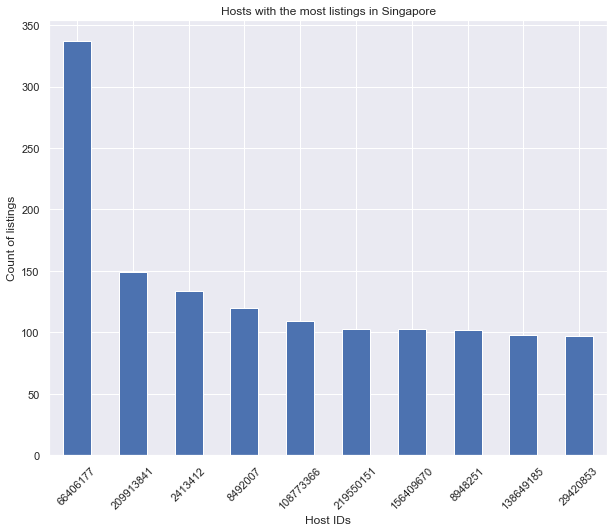

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in Singapore')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

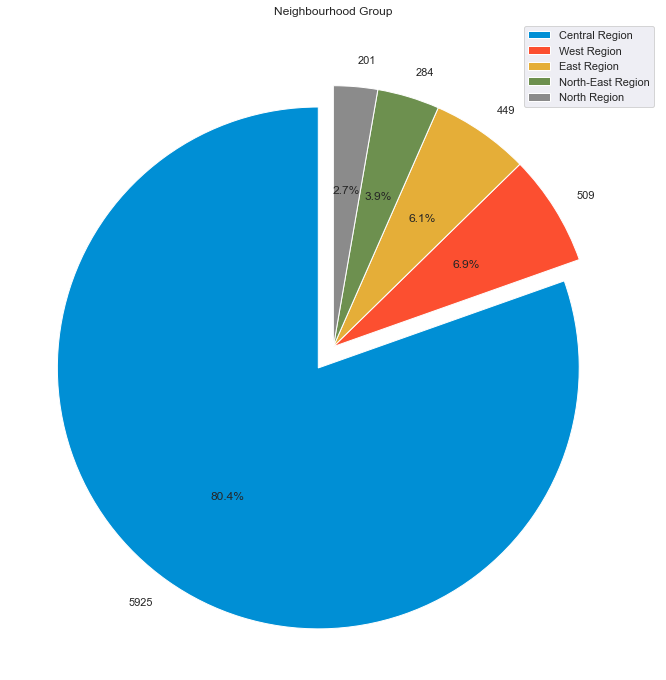

In [21]:
#Top listing counts
labels = airbnb.neighbourhood_group.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = airbnb.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [22]:
#Top Planning Areas
airbnb.neighbourhood.value_counts().head(10)

Kallang          1082
Geylang           814
Novena            543
Rochor            505
Downtown Core     486
Outram            479
Bukit Merah       364
River Valley      362
Bedok             326
Queenstown        232
Name: neighbourhood, dtype: int64

In [23]:
#Listing Map
coord = airbnb.loc[:,['longitude','latitude']]
coord.describe()

,longitude,latitude
count,7368.000000,7368.000000
mean,103.847677,1.313923
std,0.042613,0.030923
min,103.646560,1.243870
25%,103.837655,1.295920
50%,103.849660,1.311110
75%,103.865110,1.322512
max,103.971710,1.454590


In [29]:
plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
BBox = (103.5935, 104.0625, 1.1775, 1.5050)
sg_map = plt.imread('map_bnw.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
groups = airbnb.groupby('neighbourhood_group')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'map_bnw.png'

<Figure size 1296x864 with 0 Axes>

In [27]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4)
HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

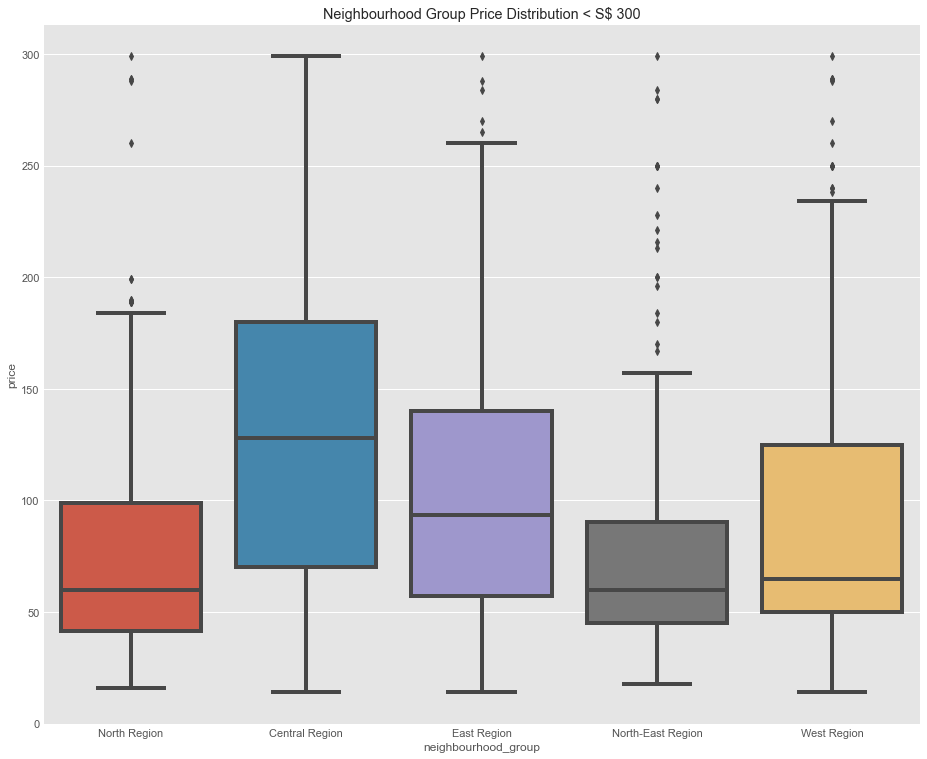

In [31]:
airbnb_1 = airbnb[airbnb.price < 300]
plt.style.use('ggplot')
plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood_group',data = airbnb_1)
plt.title('Neighbourhood Group Price Distribution < S$ 300')
plt.show()